# ZH A csoport - Összesen 10 pont - 90 perc áll rendelkezésre a megoldáshoz

## Azonosító adatok

In [ ]:
# NÉV: Nyiri László Csaba
# NEPTUN KÓD: FZJPID
# 7 pont

## Feladatok

### 1. Feladat (1 pont)

Adja meg az alábbi probléma jellemzőit, illetve cél és kezdő állapotát:
- Egy vödörben 12 liter vodkát kell elosztani két orosz paraszt Igor és Sasha között.
- Igor jobban bírja az alkoholt ezért neki 8 liter-t kell adni amíg Sasha-nak 4 litert
- Igornak 9 literes palackja van míg Sasha-nak csak 5 literes.

In [ ]:
# Válaszodat ide írd!
#Jellemzők: 
#Kezdő_állapot: I = 0, S = 0, V = 12
#Vég állapot: I = 8, S = 4, V = 0

In [ ]:
# 1 pont

### 2. Feladat (2 pont)

Add meg a szélességi keresés implementációját pythonban!

In [ ]:
# A szélességi keresés végző függvény python kódját itt írd meg!
def deadth_first_tree_search(problem):
    frontier = deque([Node(problem.initial)])
    rev_path = []
    
    while frontier:
        node = frontier.popleft()
        rev_path.append(node)

        if problem.goal_test(node.state):
            print(rev_path)
            return node
        
        frontier.expand(node.expand(problem))

    return None


In [ ]:
# 2 pont

### 3. Feladat  (3 pont)

Készíts elő egy tanítási folyamtot egy neurális hálózat számára.

In [ ]:
import pandas as pd
from tqdm import tqdm

In [10]:
fashion = pd.read_csv('fashion.csv')
fashion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Készítsen egy vizualizációt amivel megjelenti képek formájában a jellemzőket

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def viz(test_img, test_label, size=(28, 28)):
    plt.ylabel = test_label

    plt.plot.size = size

    plt.plot(test_img)

    plt.show

    # ToDo:  # ToDo: Ide írd meg a kódot pythonban!
    pass

Bontsa fel az adathalmazt Tanul és teszt adathalmazra!

In [ ]:
X_train = None  # ToDo: Ide írd meg a kódot pythonban!
y_train = None  # ToDo: Ide írd meg a kódot pythonban!

X_test = None   # ToDo: Ide írd meg a kódot pythonban!
y_test = None   # ToDo: Ide írd meg a kódot pythonban!

X_train.shape, y_train.shape, X_test.shape, y_test.shape

One hot encode-al kódolja le a célváltozólat

In [ ]:
import numpy as np
def one_hot_encode(x= np.ndarray,labels = int) -> np.ndarray:
    return np.eye(labels)[x]
    # ToDo: Ide írd meg a kódot pythonban!
    pass

In [ ]:
y_train = one_hot_encode(y_train, 10)
y_test = one_hot_encode(y_test, 10)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# 0 pont

### 4. Feladat  (2 pont)

A 3. Az előkészített adatokhoz készíts egy neurális hálózatot és tanítsd be.

<img src="    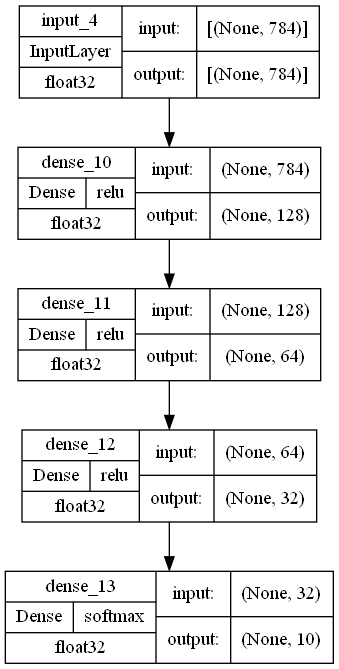" />

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])


model.compile(
    optimizer="adam", 
    loss= "categorical_crossentropy",
    metrics= ["accuracy"] 
)

#### Tanítsa be és értékelje ki a modell a következő paraméterekkel.

- batch_size = 48 
- epoch = 7

In [ ]:
# Train
# ToDo

model.fit(X_train,y_train,epochs = 7,batch_size = 48)

In [ ]:
# Evaluate
# ToDo

model.evaluate(X_test,y_test)

In [ ]:
# 2 pont

### 5. Feladat  (2 pont)

Írd meg a QLearning Agent action és learn metódusát és mutassa be egy tetszőleges példa kóddal annak működését. A következő feltételekkel:
- A learn metódus gamma paramétere tanítási ciklusonként ne változzon.
- A action epsilon paraméter tanítási ciklusonként csökkenjen.

In [ ]:
import random
import numpy as np
class QLearningAgent:
    """
    A Q-learning ügynökünket képviselő osztály
    """
    def __init__(self, n_states_row,  n_states_cols, n_actions, learning_rate):
        self.n_states_row = n_states_row
        self.n_states_cols = n_states_cols
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        
        self.q_table = np.zeros((self.n_states_row, self.n_states_cols, n_actions))
    
    def act(self, state_row, state_col, epsilon):
        random_num = random.uniform(0,1)

        if random_num >= epsilon:
            action = np.argmax(self.q_table[state_row][state_col])

        else:
            action = random.randint(0,self.n_actions -1)

        return action

        # ToDo: Ide írd meg au action módszert.
        return NotImplementedError()
    
    def learn(self, state_row, state_col, action, reward, new_state_row, new_state_col, gamma):
        old_value = self.q_table[state_row][state_col]

        new_estimate = reward + gamma * max(self.q_table[new_state_row][new_state_col])
        
        self.q_table[state_row][state_col][action] = old_value + self.learning_rate * (new_estimate - old_value)

        # ToDo: Ide írd meg a learn módszert.
        return NotImplementedError()

In [ ]:
# 2 pont